In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#https://www.kaggle.com/hugodarwood/epirecipes
#What we want to see is if we can use the ingredient and keyword list to predict the rating.

raw_data = pd.read_csv('epi_r.csv')
display(raw_data.shape)
raw_data.head()

(20052, 680)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
raw_data.groupby('rating').agg('count')

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,,,,,,,,,,,,,,,,,,,,,
0.000,1836,1331,1310,1298,1331,1836,1836,1836,1836,1836,...,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
1.250,164,126,124,123,126,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1.875,124,81,81,81,81,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
2.500,532,408,405,405,408,532,532,532,532,532,...,532,532,532,532,532,532,532,532,532,532
3.125,1489,1166,1166,1165,1166,1489,1489,1489,1489,1489,...,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489
3.750,5169,4148,4141,4138,4146,5169,5169,5169,5169,5169,...,5169,5169,5169,5169,5169,5169,5169,5169,5169,5169
4.375,8019,6558,6554,6552,6558,8019,8019,8019,8019,8019,...,8019,8019,8019,8019,8019,8019,8019,8019,8019,8019
5.000,2719,2117,2109,2107,2117,2719,2719,2719,2719,2719,...,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719


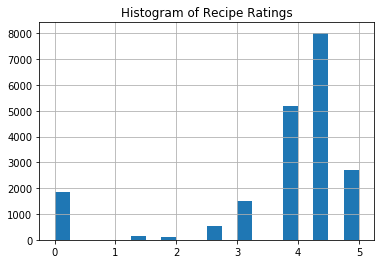

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [3]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
#svr.fit(X,Y)

In [4]:
#svr.score(X, Y)
#Returns 0.038565706512989184

In [11]:
from sklearn.model_selection import cross_val_score
#cross_val_score(svr, X, Y, cv=5)
#returns array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

# Feature Selection

In [6]:
corr = pd.DataFrame(raw_data.corr())
display(corr[corr.rating >.8]['rating'])

rating    1.0
Name: rating, dtype: float64

In [7]:
corr = corr.sort_values(by='rating', ascending=False)
corr['absrating'] = abs(corr.rating)
corr = corr[['rating', 'absrating']]
corr = corr.sort_values(by='absrating', ascending=False)
corr.head(31)

,rating,absrating
rating,1.000000,1.000000
drink,-0.241388,0.241388
alcoholic,-0.224767,0.224767
house & garden,-0.217911,0.217911
gin,-0.191400,0.191400
spirit,-0.146625,0.146625
cocktail,-0.140723,0.140723
cocktail party,-0.140482,0.140482
bitters,-0.137368,0.137368
bon appétit,0.124549,0.124549


In [8]:
featlist = [x for x in corr.head(31).index]

In [9]:
feats = raw_data[featlist]
svr = SVR()
X = feats.drop(['rating'], 1)
Y = feats.rating
svr.fit(X,Y)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
svr.score(X, Y)

0.055600120889820026

In [11]:
cross_val_score(svr, X, Y, cv=5)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

array([0.03608623, 0.04655927, 0.05399531, 0.02101306, 0.05216222])

# Switching to a classifier to predict 4+ vs lower

In [3]:
from sklearn.svm import SVC

In [7]:

raw_data['bin_rat4'] = np.where(raw_data.rating > 4, 1,0)
raw_data['bin_rat3'] = np.where(raw_data.rating > 3, 1,0)
raw_data['bin_rat2'] = np.where(raw_data.rating > 2, 1,0)
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,zucchini,cookbooks,leftovers,snack,snack week,turkey,bin_rat5,bin_rat4,bin_rat3,bin_rat2
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1


In [8]:
raw_data.shape

(20052, 684)

In [9]:
df = raw_data.dropna(axis=0, how='any')
df.shape

(15864, 684)

In [12]:
svc = SVC()

#Attempt to predict those that are greater than 4
X = df[['calories', 'protein', 'fat', 'sodium']]
Y = df['bin_rat4']
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

array([0.61720227, 0.61172392, 0.60479042, 0.6147541 , 0.61696091])

In [13]:
#Attempt to predict those that are greater than 3
X = df[['calories', 'protein', 'fat', 'sodium']]
Y = df['bin_rat3']
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

array([0.90040971, 0.89410652, 0.89442168, 0.89253073, 0.89627995])

In [14]:
#Attempt to predict those that are greater than 3
X = df[['calories', 'protein', 'fat', 'sodium']]
Y = df['bin_rat2']
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

array([0.92057989, 0.91805862, 0.91585251, 0.91490703, 0.91771753])

# This model is quite good if the cutoff is 3 stars or 2 stars, but not so good if it's <4. I'm going to see if feature engineering can improve the <4 scenario, which logically sounds the most useful.

In [67]:
#These look insane, dropping these
df[df.calories > 500000]

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,bin_rat
1304,"Rice Pilaf with Lamb, Carrots, and Raisins",4157357.0,236489.0,221495.0,3134853.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2976,Lamb Köfte with Tarator Sauce,4518216.0,166471.0,44198.0,7540990.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5138,Caramelized Apple and Pear Pie,3358029.0,58324.0,186642.0,3449373.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6368,Deep-Dish Wild Blueberry Pie,29997918.0,200210.0,1716279.0,27570999.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6912,Chocolate-Almond Pie,3358273.0,58334.0,186660.0,3449512.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9731,"Rice Pilaf with Lamb, Carrots, and Raisins",4157357.0,236489.0,221495.0,3134853.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11391,Pear-Cranberry Mincemeat Lattice Pie,30111218.0,200968.0,1722763.0,27675110.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19672,"Apricot, Cranberry and Walnut Pie",13062948.0,87188.0,747374.0,12005810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
fliers = list(df[df.calories > 500000].index)

In [17]:
df = df.drop(fliers, axis=0)

In [88]:
#Rescaling variables with that out of the way

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
cont = df[['calories', 'protein', 'fat', 'sodium']]
dfs = pd.DataFrame(scaler.fit_transform(cont), columns=cont.columns, index=cont.index)
dfs['y'] = df.bin_rat4
dfs.head()

,calories,protein,fat,sodium,y
0,-0.016465,-0.018298,-0.016618,-0.017046,0
1,-0.016529,-0.021420,-0.015836,-0.014411,1
2,-0.017190,-0.024542,-0.016618,-0.018225,0
4,-0.016129,-0.020900,-0.015396,-0.017366,0
5,-0.015014,-0.021160,-0.013099,-0.015600,1


In [17]:
svc = SVC()

X = dfs[['calories', 'protein', 'fat', 'sodium']]
Y = dfs['y']
svc.fit(X,Y)

cross_val_score(svc, X, Y, cv=5)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

array([0.54568368, 0.54585566, 0.54585566, 0.54571248, 0.54571248])

In [38]:
dfall = df.drop(['calories', 'protein', 'fat', 'sodium', 'bin_rat4', 'bin_rat3', 'bin_rat2', 'rating'], axis=1)
dfall = dfall.merge(dfs, on=dfall.index)
dfall = dfall.drop('key_0', axis=1)

In [39]:
#In theory, the below shows which binary features are most different:
diffs = dfall.groupby('y').sum().T
diffs.columns = ['bad', 'good']
diffs['dif'] = abs(diffs.bad - diffs.good)
diffs['pctdif'] = diffs.bad / diffs.good
diffs = diffs.sort_values(by='dif', ascending=False)
diffs.head(100)

,bad,good,dif,pctdif
bon appétit,2950.000000,4433.000000,1483.000000,0.665464
peanut free,2860.000000,3861.000000,1001.000000,0.740741
soy free,2759.000000,3743.000000,984.000000,0.737109
tree nut free,2411.000000,3205.000000,794.000000,0.752262
pescatarian,2154.000000,2722.000000,568.000000,0.791330
kosher,2220.000000,2765.000000,545.000000,0.802893
bake,1604.000000,2121.000000,517.000000,0.756247
fall,1003.000000,1497.000000,494.000000,0.670007
dessert,1242.000000,1710.000000,468.000000,0.726316
dinner,732.000000,1166.000000,434.000000,0.627787


In [25]:
#Let's take the 100 largest differences
cols = list(diffs.head(100).index.values)

df_dif = dfall[cols]

In [29]:
list(df_dif.columns)

['rating',
 'bon appétit',
 'peanut free',
 'soy free',
 'tree nut free',
 'pescatarian',
 'kosher',
 'bake',
 'fall',
 'dessert',
 'dinner',
 'thanksgiving',
 'vegetarian',
 'roast',
 'summer',
 'wheat/gluten-free',
 'winter',
 'fruit',
 'christmas',
 'kidney friendly',
 'protein',
 'milk/cream',
 'grill/barbecue',
 'sugar conscious',
 'gourmet',
 'no sugar added',
 'sodium',
 'tomato',
 'herb',
 'calories',
 'onion',
 'fat',
 'salad',
 'cheese',
 'drink',
 'backyard bbq',
 'dairy',
 'lunch',
 'healthy',
 'garlic',
 'house & garden',
 'beef',
 'alcoholic',
 'cake',
 'pork',
 'cocktail party',
 'appetizer',
 'chill',
 'spring',
 'high fiber',
 'egg',
 'kid-friendly',
 'grill',
 'sauté',
 'turkey',
 'mixer',
 'dairy free',
 'food processor',
 'goat cheese',
 'low carb',
 'cranberry',
 'almond',
 'fish',
 'marinate',
 'leafy green',
 'soup/stew',
 'mushroom',
 'cilantro',
 'bacon',
 'pepper',
 'low cal',
 'vinegar',
 'nut',
 'lamb',
 'hot pepper',
 'gin',
 'broil',
 'fourth of july',
 's

In [40]:
df_dif['y'] = dfall['y']
df_dif.head()

,rating,bon appétit,peanut free,soy free,tree nut free,pescatarian,kosher,bake,fall,dessert,...,walnut,raisin,father's day,freeze/chill,meat,mustard,pear,vegan,white wine,y
0,2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4.375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3.125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
svc = SVC()

X = df_dif.drop(['y', 'rating'], axis=1)
Y = df_dif['y']
svc.fit(X,Y)

cross_val_score(svc, X, Y, cv=5)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

array([0.58065532, 0.58462023, 0.56886228, 0.58102144, 0.59489281])

In [41]:
#Not much improvement. maybe picking the ones with the highest pct difference after removing tiny values?
pcts = diffs[diffs.dif>20]
pcts['pctdif'] = abs(pcts['pctdif'] -1)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
pcts = pcts.sort_values(by='pctdif', ascending=False)
pcts.head(100)

,bad,good,dif,pctdif
bitters,60.000000,16.000000,44.000000,2.750000
gin,127.000000,35.000000,92.000000,2.628571
sodium,-100.186650,100.186650,200.373301,2.000000
tofu,42.000000,14.000000,28.000000,2.000000
calories,-99.277559,99.277559,198.555119,2.000000
protein,-122.284970,122.284970,244.569941,2.000000
fat,-94.918129,94.918129,189.836257,2.000000
house & garden,239.000000,82.000000,157.000000,1.914634
spirit,110.000000,41.000000,69.000000,1.682927
harpercollins,66.000000,28.000000,38.000000,1.357143


In [43]:
#Let's take the 100 largest pct differences
cols = list(pcts.head(100).index.values)
dfpct = dfall[cols]
dfpct['y'] = dfall['y']


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
svc = SVC(gamma='auto')

X = dfpct.drop(['y', 'rating'], axis=1)
Y = dfpct['y']
svc.fit(X,Y)

cross_val_score(svc, X, Y, cv=5)

array([0.55513548, 0.56255909, 0.55783171, 0.5554855 , 0.55769231])

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(Y, svc.predict(X))

array([[ 522, 6684],
       [ 314, 8344]], dtype=int64)

# This is clearly not working. I'm going to try to make it multi class and see if that helps.

In [46]:
raw_data = pd.read_csv('epi_r.csv')
display(raw_data.shape)
raw_data.head()

(20052, 680)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df = raw_data.copy()
df['rating'] = df['rating'].astype('int')
df.dtypes[0:5]

title        object
rating        int32
calories    float64
protein     float64
fat         float64
dtype: object

In [48]:
df.groupby('rating').agg('count')

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,,,,,,,,,,,,,,,,,,,,,
0,1836,1331,1310,1298,1331,1836,1836,1836,1836,1836,...,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
1,288,207,205,204,207,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
2,532,408,405,405,408,532,532,532,532,532,...,532,532,532,532,532,532,532,532,532,532
3,6658,5314,5307,5303,5312,6658,6658,6658,6658,6658,...,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658
4,8019,6558,6554,6552,6558,8019,8019,8019,8019,8019,...,8019,8019,8019,8019,8019,8019,8019,8019,8019,8019
5,2719,2117,2109,2107,2117,2719,2719,2719,2719,2719,...,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719


In [49]:
df = df.dropna(axis=0, how='any')

In [50]:
svc = SVC(gamma='auto')

X = df[['calories', 'protein', 'fat', 'sodium']]
Y = df['rating']
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)

array([0.50346348, 0.49290892, 0.49180328, 0.50535939, 0.49889625])

In [51]:
confusion_matrix(Y, svc.predict(X))

array([[1204,    0,    0,   23,   45,   24],
       [   2,  185,    0,    8,    8,    1],
       [   8,    0,  368,   11,   17,    1],
       [  13,    0,    0, 5257,   23,    8],
       [   6,    0,    0,    3, 6536,    7],
       [  19,    0,    0,   25,   25, 2037]], dtype=int64)

# Ultimately, I could achieve decent (>90%) accuracy predicting if a recipe was greater than 3 stars, but not greater than 4.

Bias: In general, people only review things if they have an extreme experience with it (good or bad). those who think a recipe is "just alright" are just less motivated to review, so as we found, the extremes are more common in the dataset than we can presume they would be in reality. 

In addition, people who don't like a recipe may not try it in the first place, so you must keep in mind that your ratings are only people who read the recipe AND thought it sounded good enough to try. 